In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np



In [3]:
# 
audio_path = "Rihanna-stay.mp3"
y , sr = librosa.load(audio_path, sr = None)
print(y, sr)

[0. 0. 0. ... 0. 0. 0.] 48000


sr is the sampling rate -> cuantas muestras se muestran en 1 s


In [4]:
#cortaré el audio para que el proceso no se haga tan largo
start_time = 0 #seconds
end_time = 30 #seconds
cut_audio = y[:int(end_time*sr)]
print(cut_audio)

[ 0.          0.          0.         ... -0.02105878 -0.01785519
 -0.0143409 ]


In [5]:
print(len(y))
print(len(cut_audio))

12271282
1440000


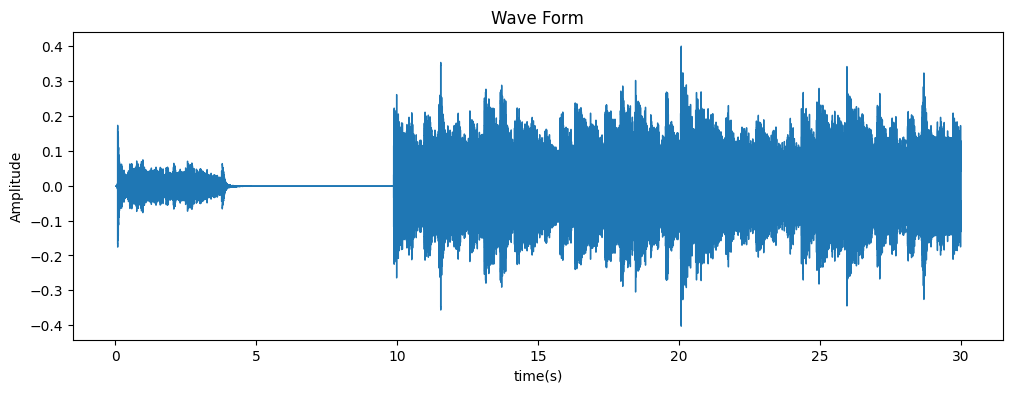

In [6]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(cut_audio, sr = sr)
plt.title ("Wave Form")
plt.xlabel("time(s)")
plt.ylabel("Amplitude")
plt.show()

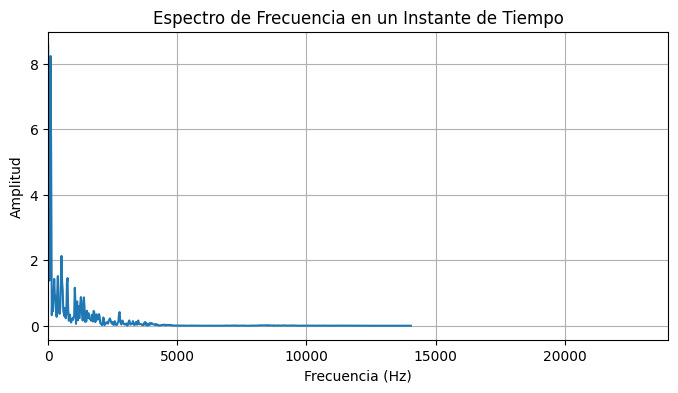

In [25]:
X = librosa.stft(cut_audio)
X_magnitude = np.abs(X)  # Magnitud del espectrograma
# print("THE FOURIER TRANSFORM" , X)
# print("THE MAGNITUD OF THE FOURIER TRANSFORM" , X_magnitude)
# Obtener número de frecuencias y tiempo
n_frequencies, n_time_frames = X.shape  # X tiene dimensiones (frecuencia, tiempo) --> X es la transformada de fourier
#es una matriz de frecuencias y tiempo -> en cada momento del tiempo del audio hay una distribución diferente de frecuencias

# Crear vector de frecuencias correspondientes a la STFT --> cuantas frecuencias se pueden marcar y visualizar
frequencies = librosa.fft_frequencies(sr=sr, n_fft=2048)

# Graficar espectro de frecuencia en un instante de tiempo
plt.figure(figsize=(8, 4))
plt.plot(frequencies[:600], X_magnitude[:600, 30])  # Tomamos la columna 50 como ejemplo
# Etiquetas
plt.title("Espectro de Frecuencia en un Instante de Tiempo")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim(0, sr / 2)  # Mostrar hasta la frecuencia de Nyquist
plt.grid()

# Mostrar gráfica
plt.show()

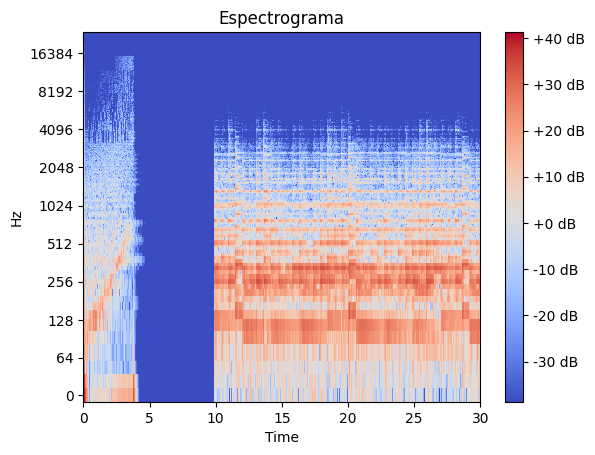

In [ ]:
X = librosa.stft(cut_audio)
X_db = librosa.amplitude_to_db(np.abs(X))
librosa.display.specshow(X_db, sr=sr, y_axis="log", x_axis="time")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram")
plt.show()

⏳ Tempo (BPM): [112.5]


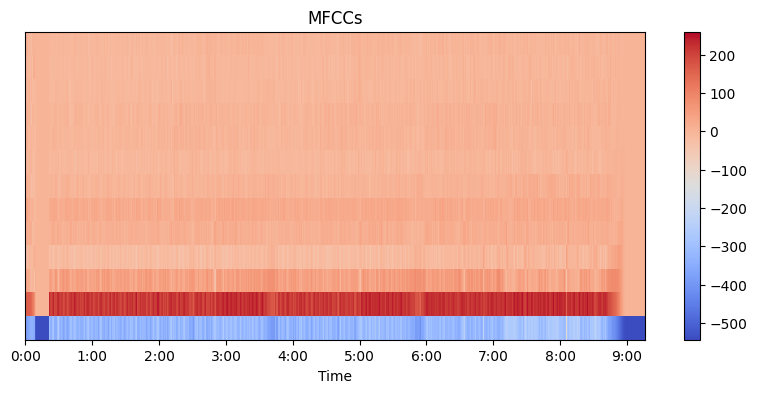

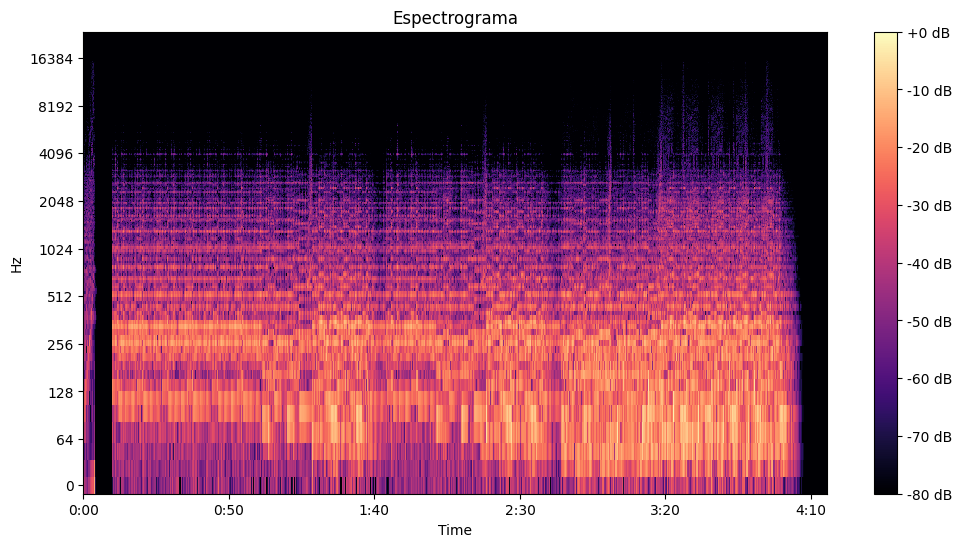

In [26]:
# Calcular Tempo (BPM)
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
tempo, _ = librosa.beat.beat_track(y=y, sr=sr, onset_envelope=onset_env)
print(f"⏳ Tempo (BPM): {tempo}")

# Extraer MFCCs (útil para IA)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.title("MFCCs")
plt.show()

# Espectrograma (Representación Visual del Sonido)
stft = np.abs(librosa.stft(y))
plt.figure(figsize=(12, 6))
librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sr, y_axis="log", x_axis="time")
plt.colorbar(format="%+2.0f dB")
plt.title("Espectrograma")
plt.show()
